<a href="https://colab.research.google.com/github/lazy-wolf/python-class-notes/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 6-12-2023
```


**1. Describe in Function in YOUR OWN WORDS**

**tf.keras.layers.Conv2D**

`The Conv2D layer is a key element in image-processing neural networks, creating a convolutional kernel to convolve with input, producing an output tensor. In the model, two Conv2D layers are added sequentially in different layers. The first has 32 filters with a 3x3 kernel and ReLU activation, expecting grayscale images of 28x28 pixels. The second adds 64 filters with a 3x3 kernel and ReLU activation, assuming input shape from the preceding layer. These layers are pivotal for extracting hierarchical features, enhancing the model's pattern recognition capabilities in the input data.`



**tf.keras.layers.MaxPooling2D**


`The MaxPooling2D layer performs spatial downsampling by selecting the maximum value within a defined window (specified by pool_size) for each channel of the input. This window shifts along each dimension according to the specified strides. In the given scenario, two MaxPooling2D layers are included in the model, both with a pool size of (2, 2). This operation aids in capturing crucial features through spatial reduction, contributing to the model's overall effectiveness in processing input data.`



**tf.keras.layers.Dropout**

`The Dropout layer introduces randomness during training by randomly setting a fraction of input units to zero, determined by the specified rate. This stochastic process, applied thrice in the provided scenario with a dropout rate of 0.25, is a regularization technique designed to prevent overfitting. Inputs that are not set to zero are scaled by a factor to maintain the overall sum, promoting a more generalized and resilient neural network.`

**tf.keras.layers.Flatten**

`The Flatten layer is applied to the input data, reshaping it from a multidimensional tensor into a one-dimensional vector. Crucially, this transformation does not impact the batch size. The inclusion of this layer is instrumental in transitioning the data flow from convolutional layers to fully connected layers within the neural network architecture.`

**tf.keras.layers.Dense**

`
The Dense layer conducts a linear operation, defined as output = activation(dot(input, kernel) + bias). It applies an element-wise activation function to the result. The layer incorporates a weights matrix ('kernel') and, if applicable, a bias vector ('bias'). In the context of the provided code, two Dense layers are added to the model. The first has 128 units and employs the ReLU activation function, while the second has 10 units and utilizes the softmax activation function. These layers contribute significantly to capturing intricate patterns and generating output suitable for classification tasks.`

**2. Setup and Load the MNIST Dataset**

**Import the necessary libraries from TensorFlow and Keras.**

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Load the MNIST dataset and split it into training and testing sets.**

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

**Normalize the pixel values of the images to the range [0, 1].**

In [33]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [34]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [35]:
x_train /= 255
x_val /= 255
x_test /= 255

**Convert the class vectors to binary class matrices (one-hot encoding).**

In [36]:
# convert y_train, y_val and y_test to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

**3. Build the CNN Model**

**Model Architecture**

In [37]:
model = Sequential()
# add a convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# add a dropout layer
model.add(Dropout(0.25))
# add a convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# add a dropout layer
model.add(Dropout(0.25))
# add a flatten layer
model.add(Flatten())
# add a dense layer
model.add(Dense(128, activation='relu'))
# add a dropout layer
model.add(Dropout(0.5))
# add a dense layer
model.add(Dense(10, activation='softmax'))

**Compilation**

In [38]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

**4. Train and Test the Model**

**Train the model on the MNIST training set. Choose an appropriate batch size and number of epochs.**

In [39]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(x_val, y_val))

Epoch 1/50
315/315 [==============================] - 4s 10ms/step - loss: 2.3078 - accuracy: 0.1120 - val_loss: 2.2913 - val_accuracy: 0.1553
Epoch 2/50
315/315 [==============================] - 2s 7ms/step - loss: 2.2943 - accuracy: 0.1216 - val_loss: 2.2788 - val_accuracy: 0.1981
Epoch 3/50
315/315 [==============================] - 2s 6ms/step - loss: 2.2799 - accuracy: 0.1414 - val_loss: 2.2666 - val_accuracy: 0.2504
Epoch 4/50
315/315 [==============================] - 2s 7ms/step - loss: 2.2672 - accuracy: 0.1552 - val_loss: 2.2545 - val_accuracy: 0.2993
Epoch 5/50
315/315 [==============================] - 2s 7ms/step - loss: 2.2570 - accuracy: 0.1665 - val_loss: 2.2423 - val_accuracy: 0.3382
Epoch 6/50
315/315 [==============================] - 3s 9ms/step - loss: 2.2441 - accuracy: 0.1830 - val_loss: 2.2297 - val_accuracy: 0.3725
Epoch 7/50
315/315 [==============================] - 2s 7ms/step - loss: 2.2296 - accuracy: 0.2013 - val_loss: 2.2166 - val_accuracy: 0.4072
Epoch

**Evaluate the model on the MNIST test set and report the accuracy.**

In [40]:
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
# print the score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9392868876457214
Test accuracy: 0.8259000182151794


**Save the training history for later analysis.**

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**5. Analysis and Reporting**

**Plot the training and validation accuracy and loss over epochs.**

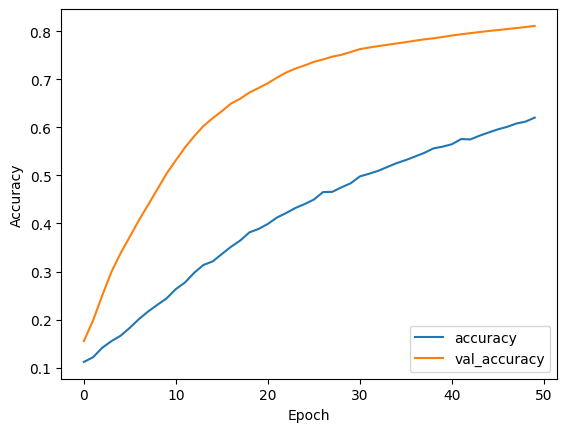

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**Discuss any signs of overfitting or underfitting and suggest possible solutions.**

**Provide a brief summary of your findings and any insights gained from this assignment.**